# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
df.to_csv('../data/raw/total_data.csv')

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

In [4]:
print(f' el numero de IDs duplicados es de : {df.id.duplicated().sum()}')

 el numero de IDs duplicados es de : 0


In [5]:
df.drop(['host_name','id','name','host_id', 'reviews_per_month'],axis=1,inplace=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



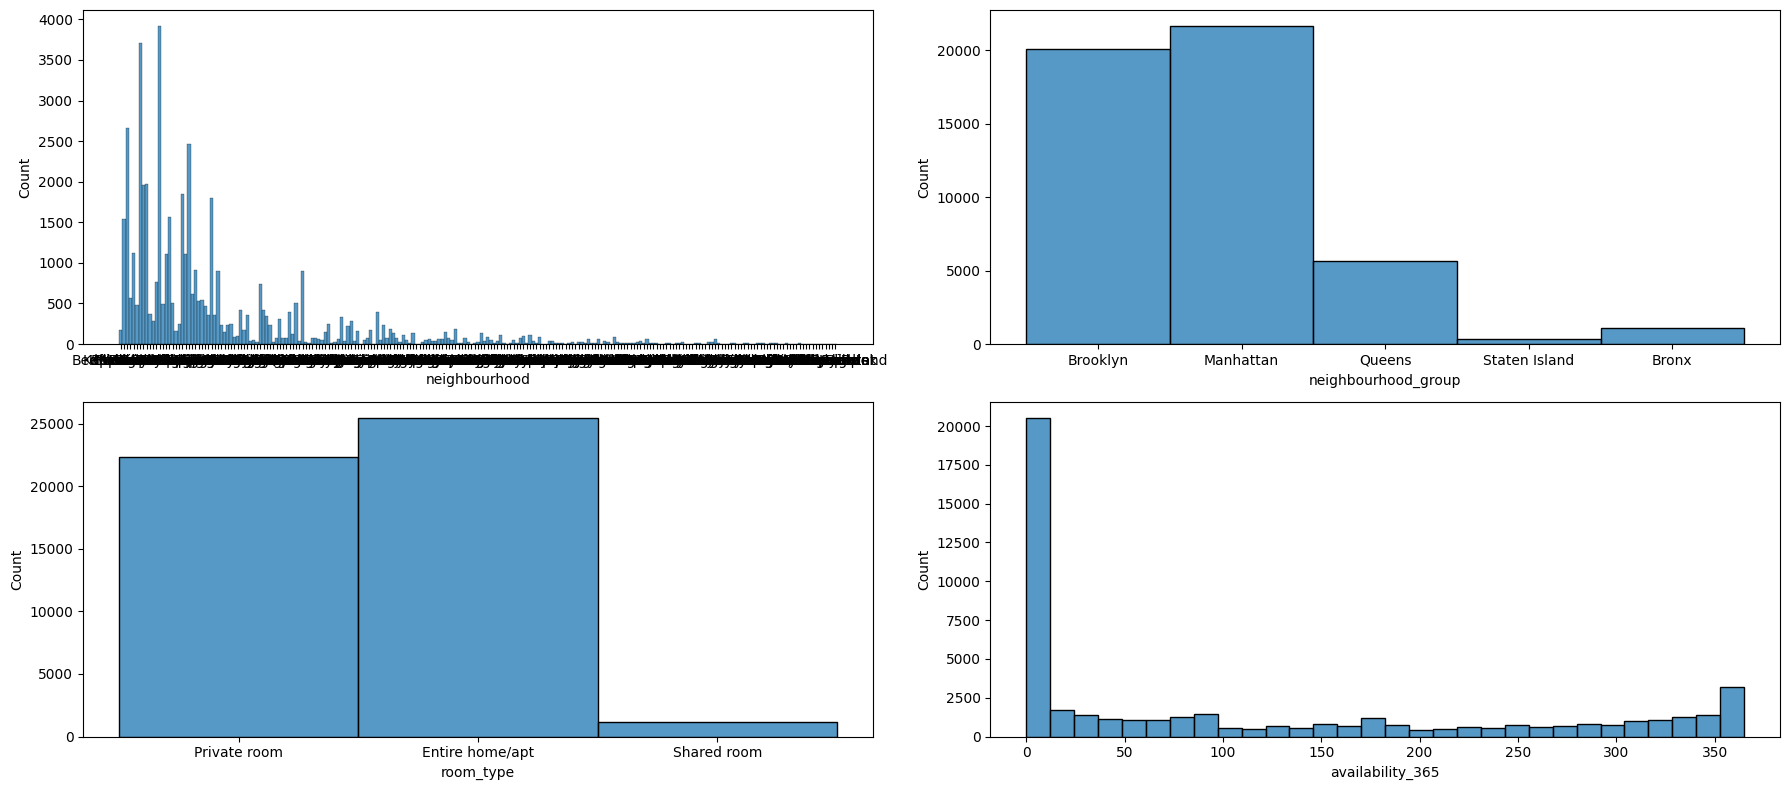

In [7]:
fig, axis = plt.subplots(2,2,figsize=(18,8))

sns.histplot(ax=axis[0,0], data = df, x= 'neighbourhood')
sns.histplot(ax=axis[0,1], data = df, x= 'neighbourhood_group')
sns.histplot(ax=axis[1,0], data = df, x= 'room_type')
sns.histplot(ax=axis[1,1], data = df, x= 'availability_365')

plt.tight_layout()

plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

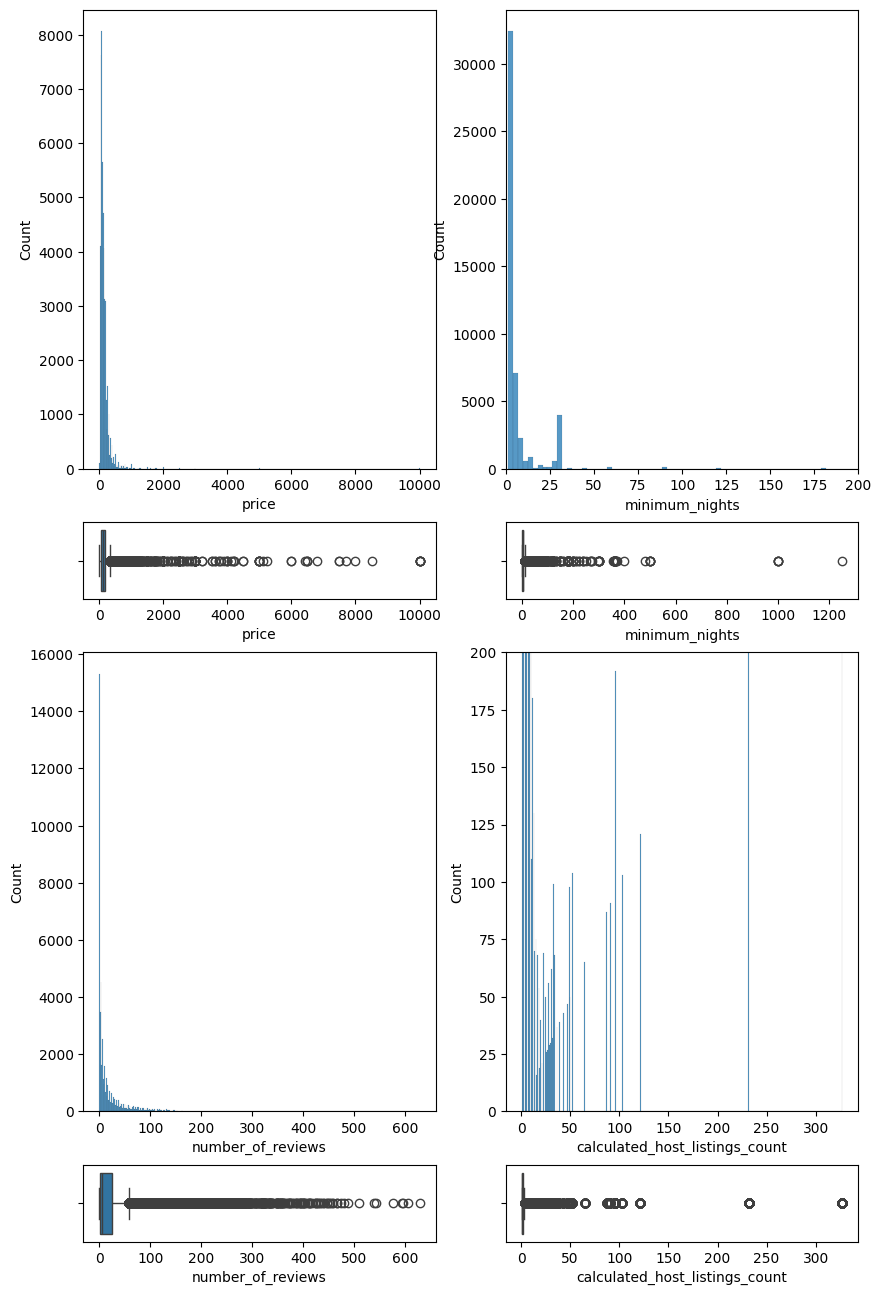

In [10]:
fig, axis = plt.subplots(4, 2, figsize = (10,16), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = df, x = "price")
sns.boxplot(ax = axis[1,0], data = df, x = "price")

sns.histplot(ax = axis[0,1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1,1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2,0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3,0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count").set_ylim(0, 200)
sns.boxplot(ax = axis[3,1], data = df, x = "calculated_host_listings_count")

plt.tight_layout



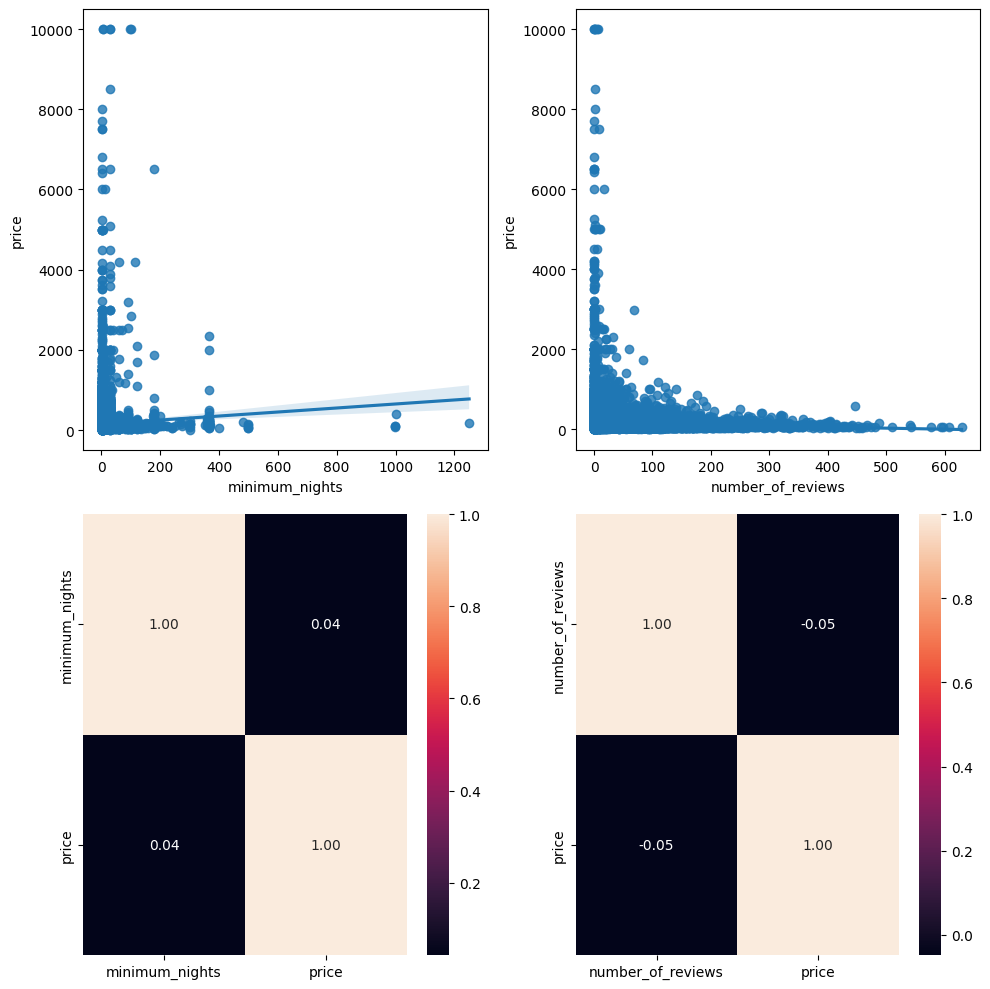

In [15]:
fig, axis = plt.subplots(2,2, figsize = (10, 10))

sns.regplot(ax=axis[0,0], data=df, x="minimum_nights", y="price")
sns.heatmap(ax=axis[1,0],data=df[['minimum_nights','price']].corr(),annot=True, fmt=".2f")

sns.regplot(ax=axis[0,1], data=df, x="number_of_reviews", y="price")
sns.heatmap(ax=axis[1,1],data=df[['number_of_reviews','price']].corr(),annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


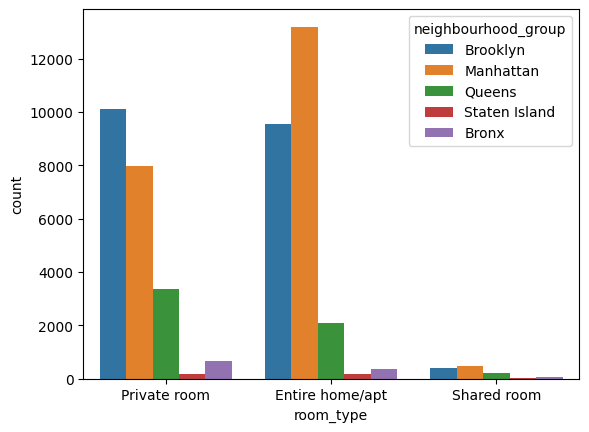

In [16]:
sns.countplot(data=df, x='room_type', hue='neighbourhood_group')
plt.show()

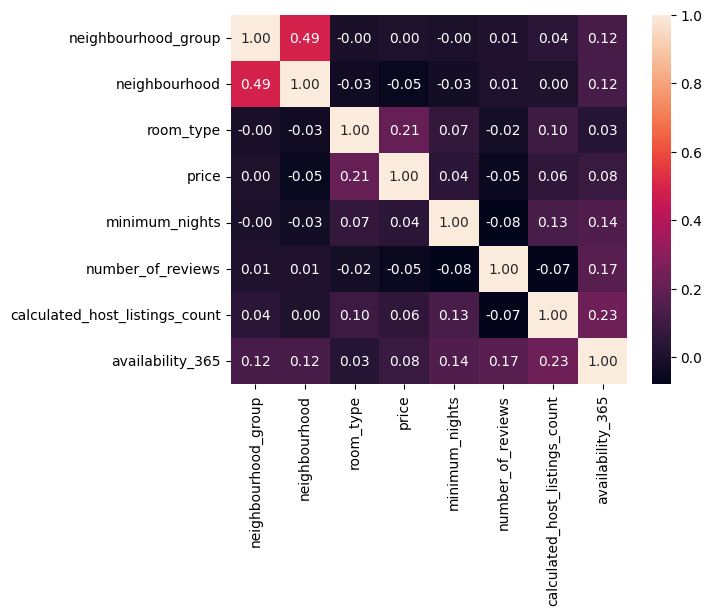

In [22]:
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]

sns.heatmap(
	df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(),
	annot=True, fmt='.2f'
)

plt.show()

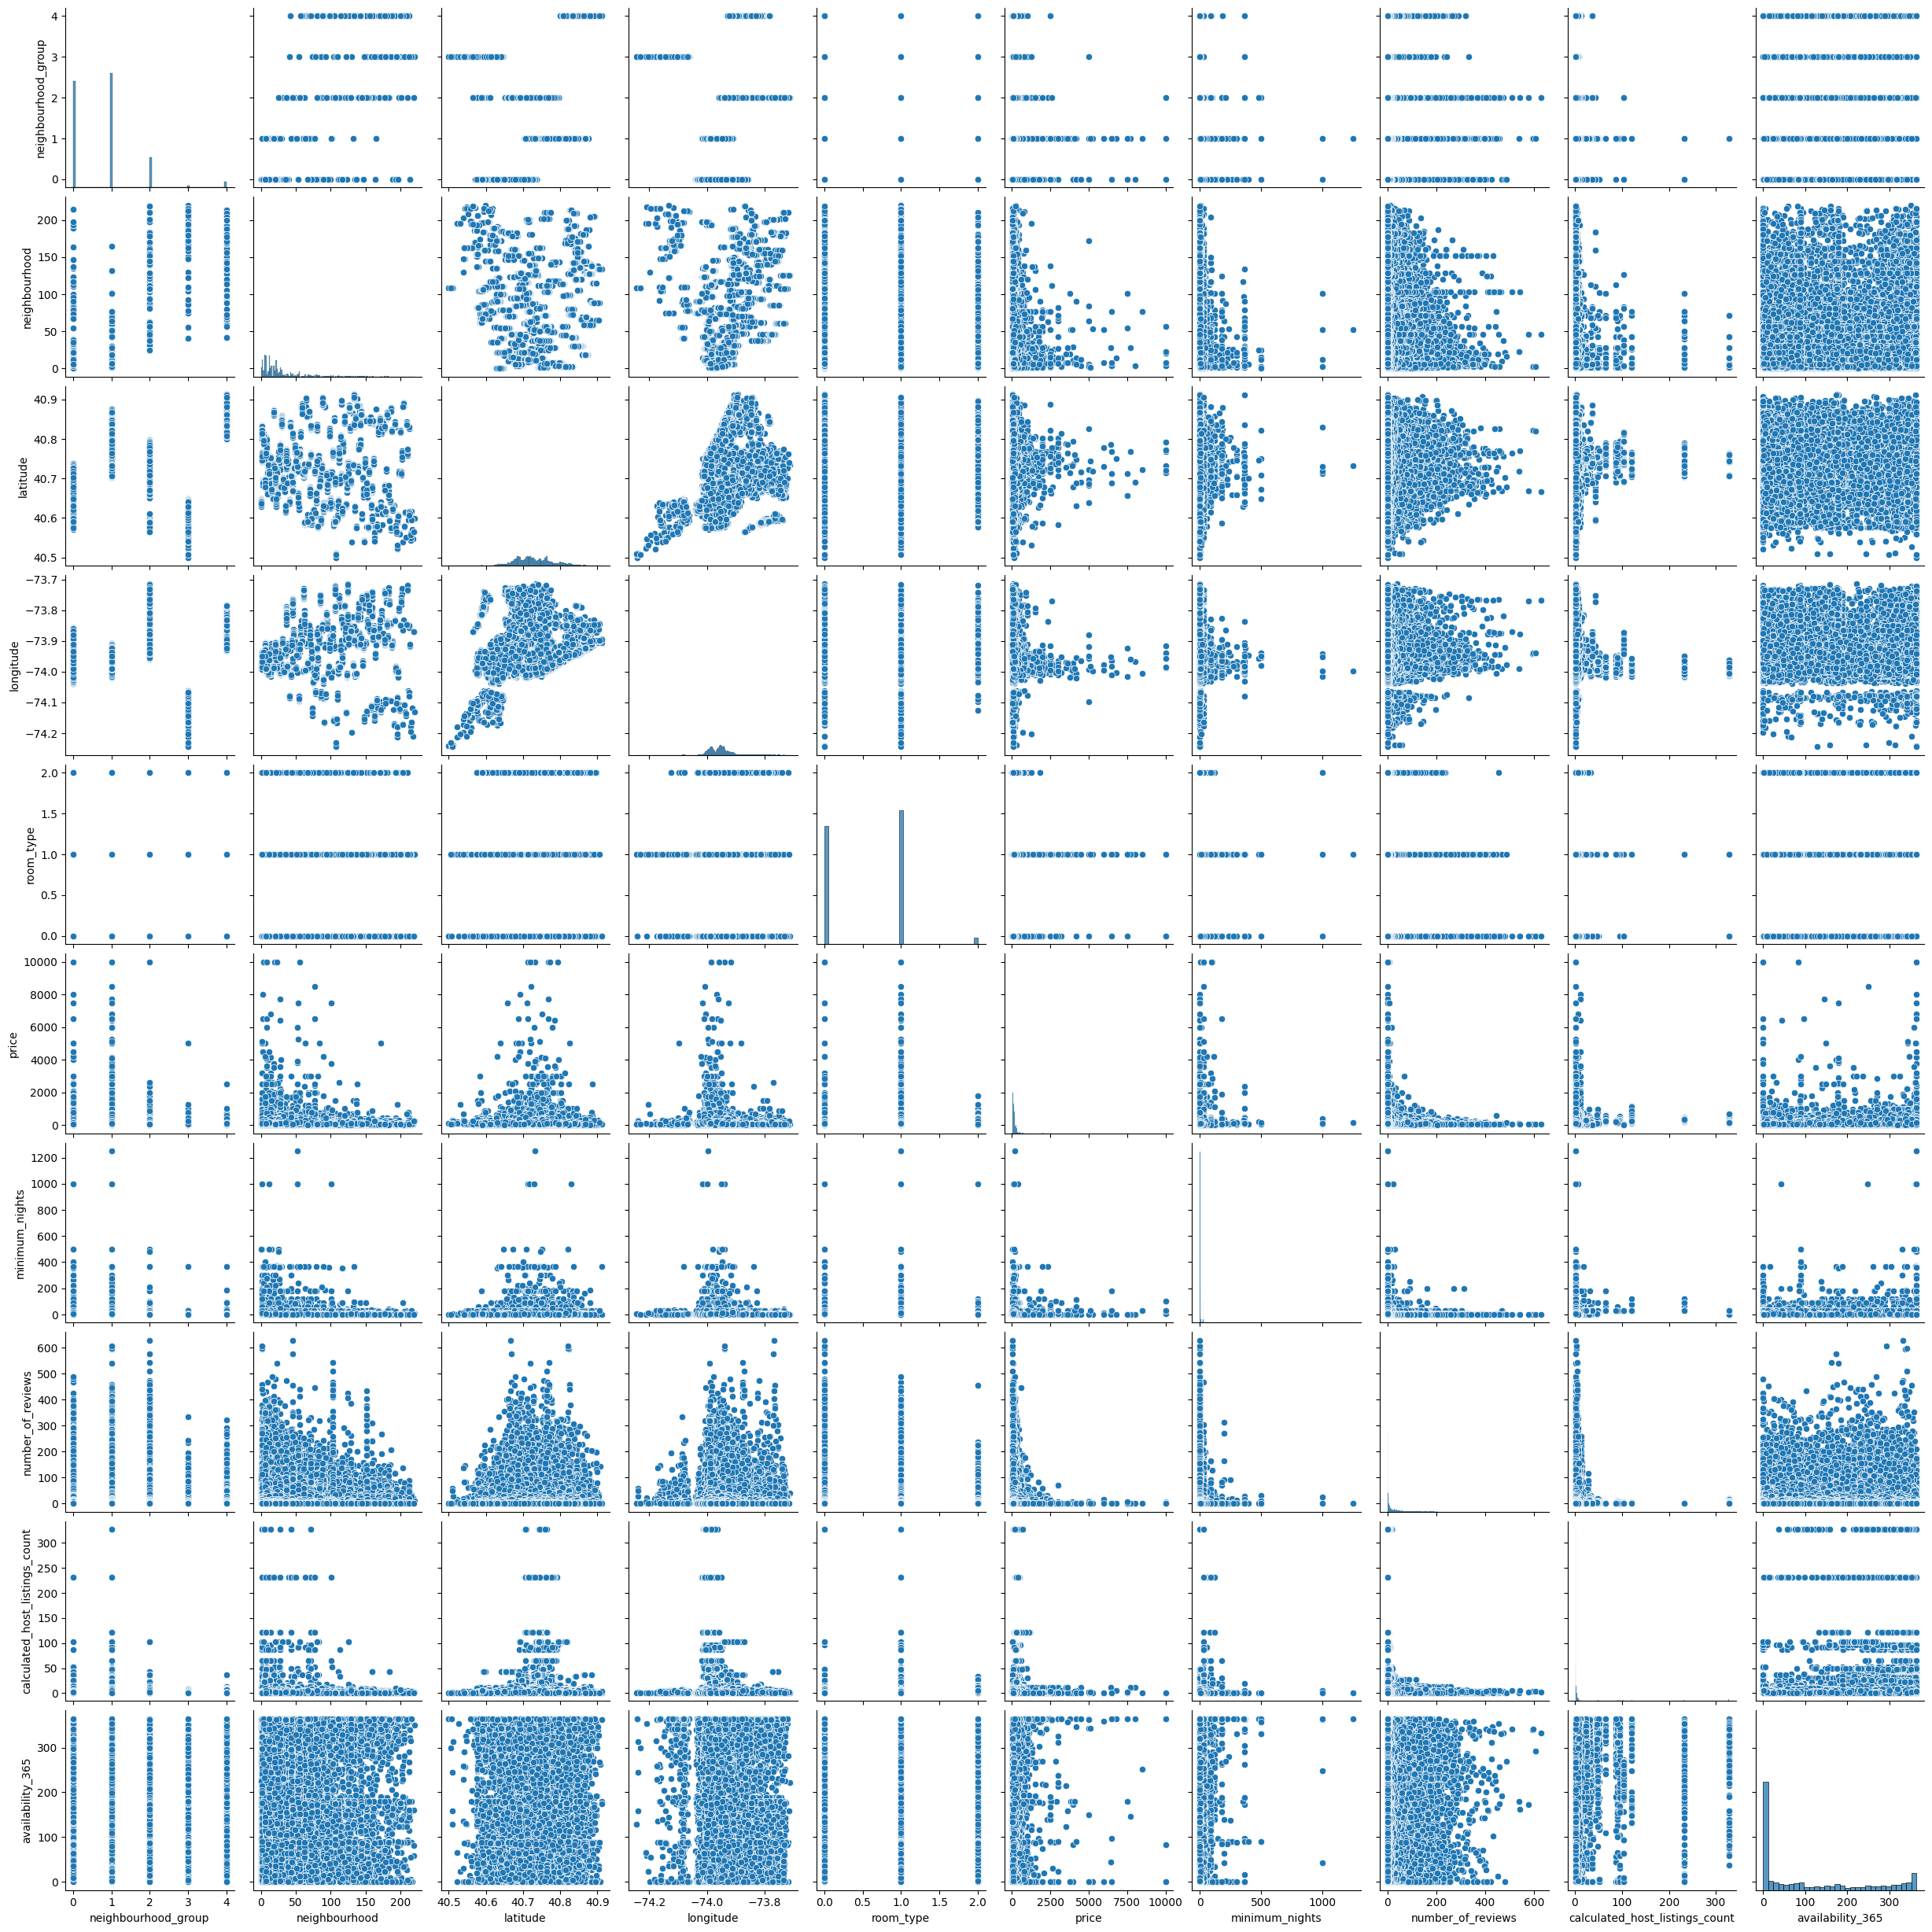

In [23]:
sns.pairplot(data=df)

In [24]:
df.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


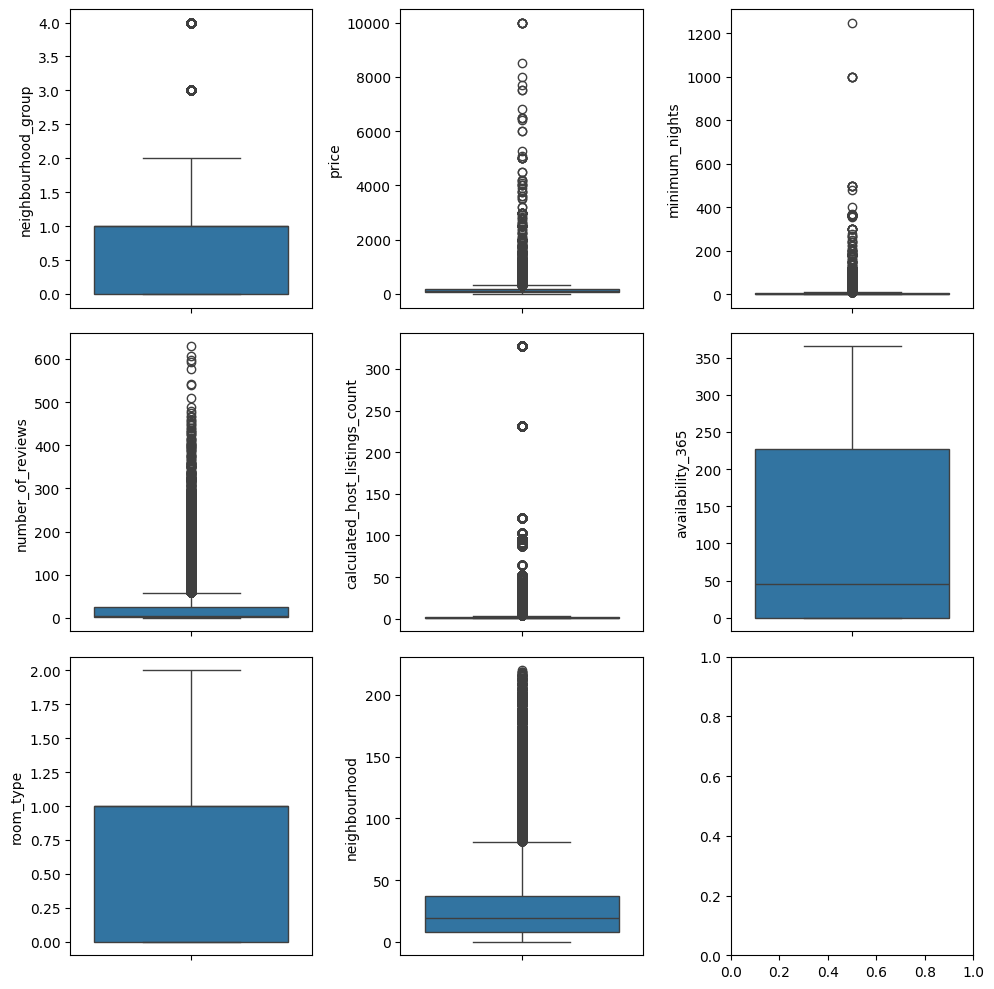

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(ax=axes[0,0], data=df, y='neighbourhood_group')
sns.boxplot(ax=axes[0,1], data=df, y='price')
sns.boxplot(ax=axes[0,2], data=df, y='minimum_nights')
sns.boxplot(ax=axes[1,0], data=df, y='number_of_reviews')
sns.boxplot(ax=axes[1,1], data=df, y='calculated_host_listings_count')
sns.boxplot(ax=axes[1,2], data=df, y='availability_365')
sns.boxplot(ax=axes[2,0], data=df, y='room_type')
sns.boxplot(ax=axes[2,1], data=df, y='neighbourhood')

plt.tight_layout()
plt.show()

In [28]:
estadisticas_de_precio = df['price'].describe()

In [30]:
estadisticas_de_precio
riq_precio = estadisticas_de_precio['75%'] - estadisticas_de_precio['25%']
limite_superior = estadisticas_de_precio['75%'] + 1.5 * riq_precio
limite_inferior = estadisticas_de_precio['25%'] - 1.5 * riq_precio

print(f'limite superior precio: {round(limite_superior,2)}')
print(f'limite inferior precio: {round(limite_inferior,2)}')

limite superior precio: 334.0
limite inferior precio: -90.0


In [31]:
df[df['price']>8000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
6530,1,4,40.79264,-73.93898,1,9999,5,1,2015-01-02,1,0
9151,2,56,40.76810,-73.91651,0,10000,100,2,2016-02-13,1,0
12342,1,23,40.71355,-73.98507,0,9999,99,6,2016-01-01,1,83
17692,0,20,40.73260,-73.95739,1,10000,5,5,2017-07-27,1,0
29238,1,8,40.77213,-73.98665,1,10000,30,0,NaN,1,83
30268,1,77,40.72197,-74.00633,1,8500,30,2,2018-09-18,1,251
40433,1,23,40.71980,-73.98566,1,9999,30,0,NaN,1,365


In [32]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [33]:
min_noches = df['minimum_nights'].describe()
riq_noches = min_noches['75%'] - min_noches['25%']
limite_superior = min_noches['75%'] + 1.5 * riq_noches
limite_inferior = min_noches['25%'] - 1.5 * riq_noches

print(f'limite superior precio: {round(limite_superior,2)}')
print(f'limite inferior precio: {round(limite_inferior,2)}')

limite superior precio: 11.0
limite inferior precio: -5.0


In [34]:
df = df[df['minimum_nights']<365]

In [35]:
df.shape

(48852, 11)

In [36]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10034
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
df = df.drop(columns=['last_review'])
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='str')

In [38]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['number_of_reviews', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'room_type']
scaler = MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(columnas_escaladas, index=df.index, columns=num_variables)
df_escalado['price'] = df['price']

df_escalado.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.005510,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.024793,0.000000,0.000000,0.25,0.5,80


In [39]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

x = df_escalado.drop('price',axis=1)
y = df_escalado['price']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

modelo_seleccion = SelectKBest(chi2, k=4)
modelo_seleccion.fit(X_train, y_train)
ix = modelo_seleccion.get_support()
X_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test), columns=X_test.columns.values[ix])

X_test_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.008264,0.003067,0.046575,0.5
1,0.002755,0.006135,0.939726,1.0
2,0.000000,0.000000,0.000000,0.0
3,0.002755,0.000000,0.000000,0.0
4,0.000000,0.006135,0.000000,0.5


In [41]:
X_train_sel['price'] = y_train
X_test_sel['price'] = y_test

X_train_sel.to_csv('../data/processed/entrenamiento_limpio.csv')
X_test_sel.to_csv('../data/processed/test_limpio.csv')  